# Convolutional Neural Network (CNN) -  MNIST

Apply a CNN to classify the MNIST dataset.

## Imports

In [34]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.datasets import mnist
from sklearn.preprocessing import StandardScaler, MinMaxScaler


## Normalization Tests

Let’s evaluate if we need to normalize the images. (should we scale the pixel values (e.g. from 0–255 to 0–1)).

In CNNs, we care about spatial patterns, so keeping the 2D structure is crucial. Pixels are spatially related, normalizing by columns can be deleterious, which means that we should not normalize features column by column like in classic ML (e.g., with StandardScaler) — because that would break the spatial structure of the image.

Let's show an example of this:

In [35]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"X_train.shape:{X_train.shape}, \nX_train type :{type(X_train)}")

X_train.shape:(60000, 28, 28), 
X_train type :<class 'numpy.ndarray'>


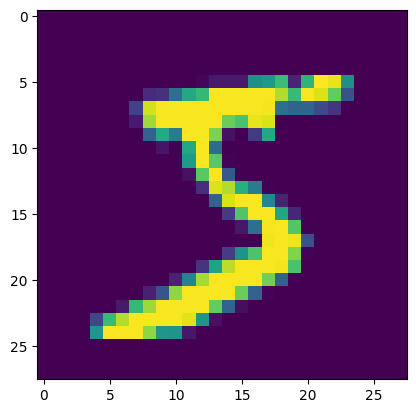

In [36]:
plt.imshow(X_train[0])

First let's apply a **MinMax Scaler** and see what happens to the image.

(28, 28)
np.max(newX0):1.0, np.max(X_train[0]):255


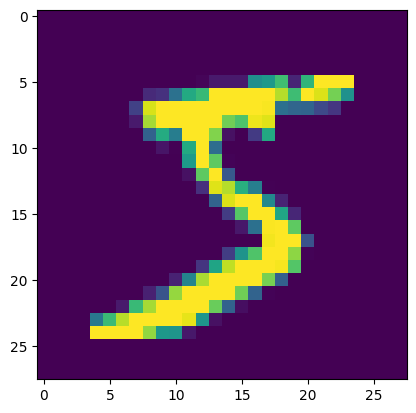

In [37]:
mm_scaler = MinMaxScaler()
newX0mm = mm_scaler.fit_transform(X_train[0]) # Apply MinMaxScaler to the first image

print(newX0mm.shape)
plt.imshow(newX0mm)
# Max value of pixel values in the scaled and original images
print(f"np.max(newX0):{np.max(newX0mm)}, np.max(X_train[0]):{np.max(X_train[0])}")

Now let's apply a **Standard scaler** and see the resulting image.

(28, 28)
np.max(newX0s):4.807278094978601, np.max(X_train[0]):255


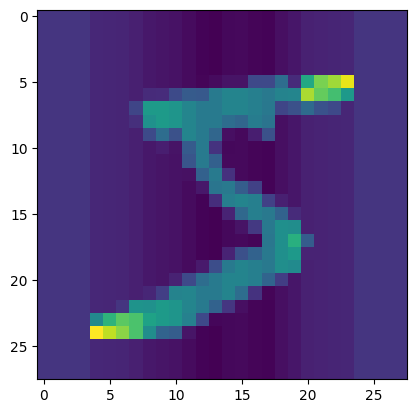

In [38]:
s_scaler = StandardScaler()
newX0s = s_scaler.fit_transform(X_train[0])

print(newX0s.shape)
plt.imshow(newX0s)
print(f"np.max(newX0s):{np.max(newX0s)}, np.max(X_train[0]):{np.max(X_train[0])}")

Let's now apply an **alternative** MinMax scaler, which is dividing all the pixels by 255

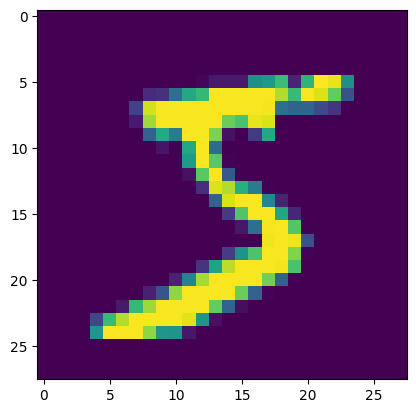

In [39]:
newX0amm = X_train[0]/np.max(X_train[0])
plt.imshow(newX0amm)

 ## Shaping data for a CNN

To feed a CNN we need to **add a dimension**: the number of input channels. Which is 1 for grayscale (our case), 3 for RGB.

We'll start without normalization.

In [ ]:
initial_shape = X_train.shape
# Print Initial shape
print(f"Initial shape: {initial_shape} \n")


X_train = X_train.reshape(initial_shape[0], initial_shape[1], initial_shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# To feed keras models we need float32 data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(f"Final shape: {X_train.shape} \n")


# Print NOT normalized pixels (0-255)
print(f"np.max(X_train):{np.max(X_train)}, np.min(X_train):{np.min(X_train)}")

Initial shape: (60000, 28, 28) 

Final shape: (60000, 28, 28, 1) 

np.max(X_train):255.0, np.min(X_train):0.0


## The Conv2D Keras layer

* Allows to create a 2D convolution
* Can be added to a Sequential model like any other layer
* Link to [documentation](https://keras.io/api/layers/convolution_layers/convolution2d/)

    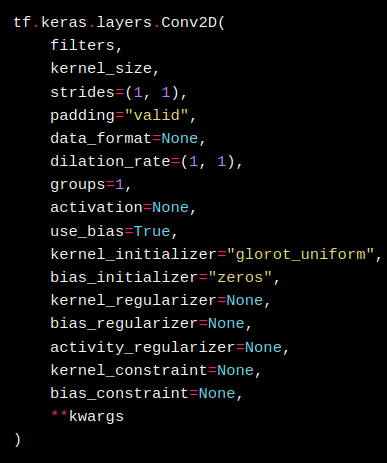

  * **filters**: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).

  * **kernel_size**: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.  
    Can be a single integer to specify the same value for all spatial dimensions.

  * **strides**: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width.  
    Can be a single integer to specify the same value for all spatial dimensions.  
    Specifying any stride value ≠ 1 is incompatible with specifying any `dilation_rate` value ≠ 1.

  * **padding**: One of `"valid"` or `"same"` (case-insensitive).  
    - `"valid"` means no padding.  
    - `"same"` results in padding with zeros evenly to the left/right or up/down of the input.

 ## MaxPooling for 2D data

*  Creates a max pooling layer
*  Even this one can be added through the model function `add()`
*  Link to [documentation](https://keras.io/api/layers/pooling_layers/max_pooling2d/)

    ![Alt Text](./images/maxPoolingClass.png)

- **pool_size**: integer or tuple of 2 integers, window size over which to take the maximum. `(2, 2)` will take the max value over a 2x2 pooling window. If only one integer is specified, the same window length will be used for both dimensions.

- **strides**: Integer, tuple of 2 integers, or `None`. Strides values. Specifies how far the pooling window moves for each pooling step. If `None`, it will default to `pool_size`.

- **padding**: One of `"valid"` or `"same"` (case-insensitive). `"valid"` means no padding. `"same"` results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.

## Flattening maps

* Use the Keras layer ```Flatten```
* Can be added as any Keras layer with the Model method ```add()```
* Link to [Documentation](https://keras.io/api/layers/reshaping_layers/flatten/)

## **Building the CNN model**


In [41]:
n_classes = len(np.unique(y_train)) # 10 for MNIST
input_shape = (X_train.shape[1], X_train.shape[2], 1) # add 1 for grayscale (CNN)
print(f"n_classes:{n_classes}, input_shape:{input_shape}")

n_classes:10, input_shape:(28, 28, 1)


In [42]:
model = Sequential()

# Input layer
model.add(
    Conv2D(
        64, # Number of filters
        kernel_size=(3,3),
        input_shape = input_shape,
        padding = "same",
        activation='relu'
    ))

model.add(
    Conv2D(
        32,
        kernel_size=(3,3),
        padding = "same",
        activation='relu'
    ))

model.add(
    Conv2D(
        16,
        kernel_size=(2,2),
        padding = "same",
        activation='relu'
    ))

model.add(MaxPooling2D(pool_size=(2, 2))) # downsizing images
model.add(Flatten())                      # flattening output feature maps
model.add(Dense(128, activation='relu'))  # adding a Dense layer of 128 neurons with relu
model.add(Dropout(0.2))                   # Implementing dropout regularization with p = 0.2
model.add(Dense(64, activation='relu'))   # adding a Dense layer of 64 neurons with relu
model.add(Dropout(0.2))                   # Implementing dropout regularization with p = 0.2     
model.add(Dense(n_classes, activation=tf.nn.softmax)) # adding an output layer (with 10 possible outputs for the 10 digits we need to predict)

print(model.summary()) 

/Users/theo/Desktop/theo/Uni/Second Year/Second Semester/NN & DL/Labs/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 16)     │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 431,610 (1.65 MB)

 Trainable params: 431,610 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

None


### Number of Parameters
1. **First conv layer**: 
    * #parameters = 640 = [9(3x3 filter)+1(bias)]*64 
    *  feature map dim: 28x28 (same padding)
2. **Second conv layer**:
    * #parameters = 18464 = (9\*64 +1 (bias))\*32 
    *  feature map dim: 28x28 (same padding)
3. **Third conv layer**:
    * #parameters = 2064 = (4\*32 +1)\*16 
    *  feature map dim: 28x28 (same padding)
4. **Max pooling layer**: 
    * #parameters = 0
    * feature map dim: (I-F)/S +1 = (28-2)/2 +1 = 14 (the default value for stride S is pool_size F)
5. **Flatten size layer**: 
    *  output shape: 14\*14\*16 = 3136
6. **First Fully Connected (FC or Dense) layer**:
    * #parameters (3136+1(bias))\*128 = 401536


## Training the model

In [43]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model.fit(
    x=X_train,y=y_train,
    epochs=20,
    batch_size=64
)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.8413 - loss: 0.6409
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9743 - loss: 0.0905
Epoch 3/20
335/938 ━━━━━━━━━━━━━━━━━━━━ 42s 71ms/step - accuracy: 0.9849 - loss: 0.0504

KeyboardInterrupt: 

## Test accuracy

In [ ]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
print(pred[:5])
pred = np.argmax(pred, axis=1)
print(pred[:5])
print(y_test[:5])

print(f"Test accuracy: {accuracy_score(y_test, pred)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
[[1.0681507e-31 3.2704443e-21 4.3026725e-22 7.3408266e-20 2.5359890e-23
  4.6066933e-25 0.0000000e+00 1.0000000e+00 3.7945595e-23 1.2872959e-16]
 [1.8844739e-21 1.4179370e-19 1.0000000e+00 5.1002141e-14 1.0148347e-28
  1.2248262e-26 3.3765814e-26 1.9167192e-24 7.1046265e-16 1.8341103e-23]
 [1.9752180e-16 1.0000000e+00 1.9130097e-15 8.8361682e-20 1.2420795e-12
  2.0002854e-13 2.7063445e-13 6.1860169e-13 8.7044441e-11 5.9472365e-11]
 [1.0000000e+00 3.0174989e-13 3.6618205e-11 3.2682607e-14 1.0523456e-15
  5.5648226e-11 2.6886739e-11 1.7441406e-17 3.7511869e-09 3.6656955e-09]
 [1.3989232e-19 2.9859010e-17 1.9336980e-17 9.9817805e-24 1.0000000e+00
  1.8386061e-17 8.0850661e-16 2.0051508e-14 3.8471076e-13 1.4879821e-11]]
[7 2 1 0 4]
[7 2 1 0 4]
Test accuracy: 0.9892


___

# **Exercise**


> #### Create a CNN to classify MNIST images by combining convolutional, pooling and fully connected (FC) layers for classification
1. #### Operate a model selection on the number of filters and the filter size to be used in conv layers
   * #### To reduce the degree of freedom, select configurations having approximately the same number of parameters
   * #### For instance, 64 filters of size 3x3 on a single input channel takes (9+1)\*64 = 640 parameters, with a 2x2 filter to get 640 parameters we need to use 128 filters  
2. #### Assess the impact of input minmax normalization of images
3. #### Once found the best configuration using validation data, try a further model selection on the learning rate alone before merging train and validation data  

___

## Imports

In [100]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras_tuner import HyperModel
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

## Model Definition

`build_model` function that receives the parameters for the number of filters and the filter size, and creates the sequential model with the following layers:
1) Convolutional
2) Pooling
3) Convolutional
4) Pooling
5) Flatten
6) Dense
7) Dense

In [101]:

def build_model(input_shape=(28, 28, 1), num_filters=32, kernel_size=3, learning_rate=1e-3):
    # Adjust filter count based on kernel size
    if kernel_size == 2:
        adjusted_filters = num_filters * 2
    elif kernel_size == 3:
        adjusted_filters = num_filters
    else:
        adjusted_filters = num_filters // 2
    
    model = Sequential([
        Conv2D(adjusted_filters, (kernel_size, kernel_size), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(adjusted_filters * 2, (kernel_size, kernel_size), padding="same", activation='relu'),
        MaxPooling2D((2, 2)),
        
        # EXTRA
        Conv2D(adjusted_filters * 4, (kernel_size, kernel_size), padding="same", activation='relu'),
        MaxPooling2D((2, 2)),
        # EXTRA
        
        
        # More filters in the 2nd Conv2D layer becausese
        # as you go deeper in a CNN, the spatial resolution decreases (due to pooling), 
        # but the complexity of features increases; so: 
        # • First layer detects simple patterns like edges or corners.
        # • Second layer combines those to detect more abstract features.
        # • Hence, we increase the number of filters to let the network learn more feature types at the deeper level.

        Flatten(),
        # EXTRA
        Dense(128, activation='relu'),
        # EXTRA
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [102]:
class CNNHyperModel(HyperModel):
    def __init__(self, x_train, y_train, x_val, y_val, fixed_hp=None):
        self.x_train = x_train
        self.y_train = y_train
        self.x_val = x_val
        self.y_val = y_val
        self.fixed_hp = fixed_hp or {}

    def build(self, hp):
        # Use fixed values if provided, otherwise allow tuning
        filters = self.fixed_hp.get("filters") or hp.Choice('filters', [32, 64])
        kernel_size = self.fixed_hp.get("kernel_size") or hp.Choice('kernel_size', [2, 3, 4, 5])
        preprocessing = self.fixed_hp.get("preprocessing") or hp.Choice('preprocessing', ['minmax', 'none'])
        learning_rate = self.fixed_hp.get("learning_rate") or hp.Choice('learning_rate', [1e-2, 1e-3, 5e-3, 1e-4, 5e-4])

        # Preprocess data
        x_train_processed = self._preprocess(self.x_train, preprocessing)
        x_val_processed = self._preprocess(self.x_val, preprocessing)


        model = build_model(num_filters=filters, kernel_size=kernel_size, learning_rate=learning_rate)

        self.x_train_processed = x_train_processed
        self.x_val_processed = x_val_processed

        return model

    def _preprocess(self, x, method):
        if method == 'minmax':
            return x.astype("float32") / 255.0
        else:
            return x

## Prepare Data

In [103]:
# Load data
(x_train, y_train), (x_val, y_val) = keras.datasets.mnist.load_data()


print(f"Initial shape: {x_train.shape} \n")

# Add channel dimension and cast to float32
x_train = x_train[..., np.newaxis].astype("float32")
x_val = x_val[..., np.newaxis].astype("float32")

print(f"Final shape: {x_train.shape}")


Initial shape: (60000, 28, 28) 

Final shape: (60000, 28, 28, 1)


## Train Model

In [104]:
hypermodel = CNNHyperModel(x_train, y_train, x_val, y_val, {"learning_rate": 1e-3 })

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=16,
    executions_per_trial=1,
    overwrite=True,
    directory='mnist_cnn_tuning',
    project_name='cnn_with_preprocessing'
)

/Users/theo/Desktop/theo/Uni/Second Year/Second Semester/NN & DL/Labs/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [105]:
tuner.search(
    x=hypermodel.x_train,
    y=hypermodel.y_train,
    validation_data=(hypermodel.x_val, hypermodel.y_val),
    epochs=5,
    batch_size=64,
    verbose=2
)

Trial 16 Complete [00h 01m 57s]
val_accuracy: 0.9839000105857849

Best val_accuracy So Far: 0.9914000034332275
Total elapsed time: 00h 38m 37s


In [106]:
tuner.results_summary()

Results summary
Results in mnist_cnn_tuning/cnn_with_preprocessing
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 02 summary
Hyperparameters:
filters: 64
kernel_size: 3
preprocessing: none
Score: 0.9914000034332275

Trial 13 summary
Hyperparameters:
filters: 64
kernel_size: 4
preprocessing: none
Score: 0.9909999966621399

Trial 10 summary
Hyperparameters:
filters: 64
kernel_size: 5
preprocessing: none
Score: 0.9908000230789185

Trial 03 summary
Hyperparameters:
filters: 64
kernel_size: 3
preprocessing: minmax
Score: 0.9907000064849854

Trial 00 summary
Hyperparameters:
filters: 32
kernel_size: 3
preprocessing: minmax
Score: 0.9891999959945679

Trial 14 summary
Hyperparameters:
filters: 64
kernel_size: 2
preprocessing: minmax
Score: 0.9890000224113464

Trial 06 summary
Hyperparameters:
filters: 32
kernel_size: 4
preprocessing: none
Score: 0.9886999726295471

Trial 09 summary
Hyperparameters:
filters: 32
kernel_size: 2
preprocessing: none
Score: 0.988699972

In [116]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]


print("Best hyperparameters")
print(f"Filters: {best_hp.get('filters')}")
print(f"Kernel size: {best_hp.get('kernel_size')}")
print(f"Preprocessing: {best_hp.get('preprocessing')}")

best_model.summary()


Best hyperparameters
Filters: 64
Kernel size: 3
Preprocessing: none


/Users/theo/Desktop/theo/Uni/Second Year/Second Semester/NN & DL/Labs/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/theo/Desktop/theo/Uni/Second Year/Second Semester/NN & DL/Labs/venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,610 (2.57 MB)

 Trainable params: 673,610 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

## Tune Learning Rate


In [ ]:

fixed_values = {
    "filters": best_hp.get("filters"),
    "kernel_size": best_hp.get("kernel_size"),
    "preprocessing": best_hp.get("preprocessing")
}

lr_hypermodel = CNNHyperModel(x_train, y_train, x_val, y_val, fixed_hp=fixed_values)

lr_tuner = RandomSearch(
    lr_hypermodel,
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,0
    directory="mnist_cnn_lr_tuning",
    project_name="cnn_lr_only"
)

lr_tuner.search(
    x=lr_hypermodel.x_train,
    y=lr_hypermodel.y_train,
    validation_data=(lr_hypermodel.x_val, lr_hypermodel.y_val),
    epochs=15,
    batch_size=64,
    verbose=2
)

Trial 5 Complete [00h 10m 38s]
val_accuracy: 0.9782000184059143

Best val_accuracy So Far: 0.9930999875068665
Total elapsed time: 01h 01m 02s


In [118]:
lr_tuner.results_summary()


Results summary
Results in mnist_cnn_lr_tuning/cnn_lr_only
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 00 summary
Hyperparameters:
learning_rate: 0.0005
Score: 0.9930999875068665

Trial 02 summary
Hyperparameters:
learning_rate: 0.0001
Score: 0.992900013923645

Trial 01 summary
Hyperparameters:
learning_rate: 0.001
Score: 0.9916999936103821

Trial 04 summary
Hyperparameters:
learning_rate: 0.005
Score: 0.9782000184059143

Trial 03 summary
Hyperparameters:
learning_rate: 0.01
Score: 0.9685999751091003
